In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

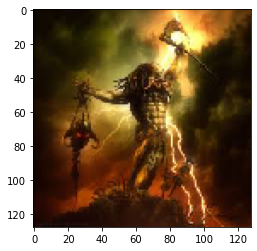

In [3]:
img = image.load_img("data/train/predator/5.jpg",target_size=(128, 128))
plt.imshow(img)
plt.show()


In [4]:
img = np.array(img)
img.shape

(128, 128, 3)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='data/train'

train_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.2,
                                 rotation_range=15,
                                 brightness_range=[0.5,1.5],
                                 horizontal_flip=True)

train_set=train_datagen.flow_from_directory(
        directory=train_dir,
        class_mode='binary',
        color_mode='rgb',
        target_size=(128,128),
        batch_size=32)

valid_dir='data/validation'
val_datagen=ImageDataGenerator(rescale=1/64)

val_set=val_datagen.flow_from_directory(
        directory=valid_dir,
        class_mode='binary',
        color_mode='rgb',
        target_size=(128,128),
        batch_size=32
)


Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation = 'relu',padding="same"))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 

classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [9]:
history = classifier.fit(train_set,
                        steps_per_epoch=len(train_set),
                        epochs = 20,
                        validation_data = val_set,
                        validation_steps =len(val_set), 
                        );

Epoch 1/20
22/22 [==============================] - 6s 285ms/step - loss: 0.5722 - accuracy: 0.7089 - val_loss: 0.9587 - val_accuracy: 0.6200
Epoch 2/20
22/22 [==============================] - 6s 290ms/step - loss: 0.6081 - accuracy: 0.6700 - val_loss: 0.9466 - val_accuracy: 0.6750
Epoch 3/20
22/22 [==============================] - 6s 289ms/step - loss: 0.5372 - accuracy: 0.7320 - val_loss: 1.0107 - val_accuracy: 0.6700
Epoch 4/20
22/22 [==============================] - 6s 288ms/step - loss: 0.5651 - accuracy: 0.7219 - val_loss: 0.6154 - val_accuracy: 0.7200
Epoch 5/20
22/22 [==============================] - 6s 292ms/step - loss: 0.5085 - accuracy: 0.7464 - val_loss: 0.7702 - val_accuracy: 0.7350
Epoch 6/20
22/22 [==============================] - 6s 288ms/step - loss: 0.4804 - accuracy: 0.7594 - val_loss: 1.0690 - val_accuracy: 0.6600
Epoch 7/20
22/22 [==============================] - 6s 290ms/step - loss: 0.5130 - accuracy: 0.7507 - val_loss: 1.0697 - val_accuracy: 0.6400
Epoch 

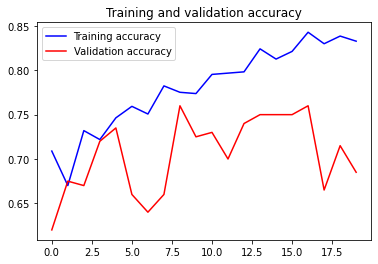

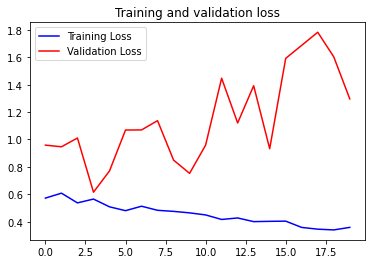

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
x1 = classifier.evaluate(train_set)
x2 = classifier.evaluate(val_set)
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

7/7 [==============================] - 0s 60ms/step - loss: 1.2962 - accuracy: 0.6850
Training Accuracy  : 84.58%     Training loss  : 0.347605
Validation Accuracy: 68.50%     Validation loss: 1.296193


In [13]:
classifier.save('AlienOrPredator.h5')